# **Aws DB**

- On-Premise 환경에서 사용 중인 MySQL을 AWS로 마이그레이션 할 때 다음 세 가지 옵션이 존재.(postgres 도 존재하지만 이번에는 검색의 편의를 위해 MySQL로 진행)

1. EC2 인스턴스에 오픈 소스 DB인 MySQL을 설치하고 운영
  - 가격적으로 제일 저렴하나 직접 설치, 프로비저닝, 복제, 백업, 패치 등 운영 관리 필요.

2. Amazon Relational Database Service(RDS) for MySQL 서비스 사용
  - AWS의 관리형 데이터베이스 RDS MySQL을 사용하는 것.

3. Amazon Relational Database Service(RDS) for Aurora 서비스 사용 (MySQL과 호환)
  - MySQL과 호환되는 AWS가 자체 개발한 RDS Aurora로 데이터베이스를 마이그레이션 하는 것.






# **Amazon Aurora**

**Amazon Aurora(Aurora)는 MySQL 및 PostgreSQL과 호환되는 완전 관리형 관계형 데이터베이스 엔진**

- Aurora 플랫폼은 AWS만의 관계형 데이터베이스로써, 기존의 소스를 커스터마이징하여 AWS에 최적화 시킨 것이 특징
- 기존 RDS의 모든 관리 기능 뿐만 아니라, 데이터베이스에 최적화된 스토리지 하위 시스템을 제공하여 RDS 플랫폼을 확장
- RDS에서 사용하는 EBS 스토리지 대신, NVMe SSD 드라이브 위에 구축되어 훨씬 빠른 성능 이점을 제공

**특징**

- 애플리케이션에 따라 자동으로 확장
- 6개의 데이터 복사본을 만들어 여러 위치에 배포하고 Amazon S3 에 지속적으로 백업
- 99.99% 이상의 가용성 제공
- 스토리지 장애로부터 투명하게 복구
- 일반적으로 30초 미만의 인스턴스 장애조치 허용
- 직전 Point(Previous Point)로부터 빠른 데이터 복원(Restore)가 가능하다.
- capacity가 늘어나면 자동으로 Scaling 된다. (확장성)
- 분산된 스토리지로부터 지속적인 Check-Pointing이 가능하다. (출력/가용성/내구성 향상)
- Computing과 Storage를 분리하여 I/O 병목 현상을 줄였다.



- Aurora는 빠른 로컬 성능 및 재해 복구를 위해 여러 지역에 데이터를 복제하고, 컴퓨팅 및 스토리지 작업을 분리하여, I/O 병목현상을 줄인다.

- 로컬 스토리지에 대한 체크포인트 작업으로, 데이터베이스 인스턴스에 부담을 주는 대신 Aurora는 지속적인 체크포인트를 위해 분산 스토리지 플릿을 사용.
- 분산 스토리지 플릿은 Aurora가 처리량 측면에서 표준 MySQL을 능가하는데 도움이 되며 가용성과 내구성도 향상.



# **AWS RDS와 AWS Aurora의 차이점**

AWS Aurora 는 Shared Storage를 사용하며, MySQL 경우 Binlog 기반의 Replication이 아닌 Storage와 Page 기반의 Replication을 사용한다.

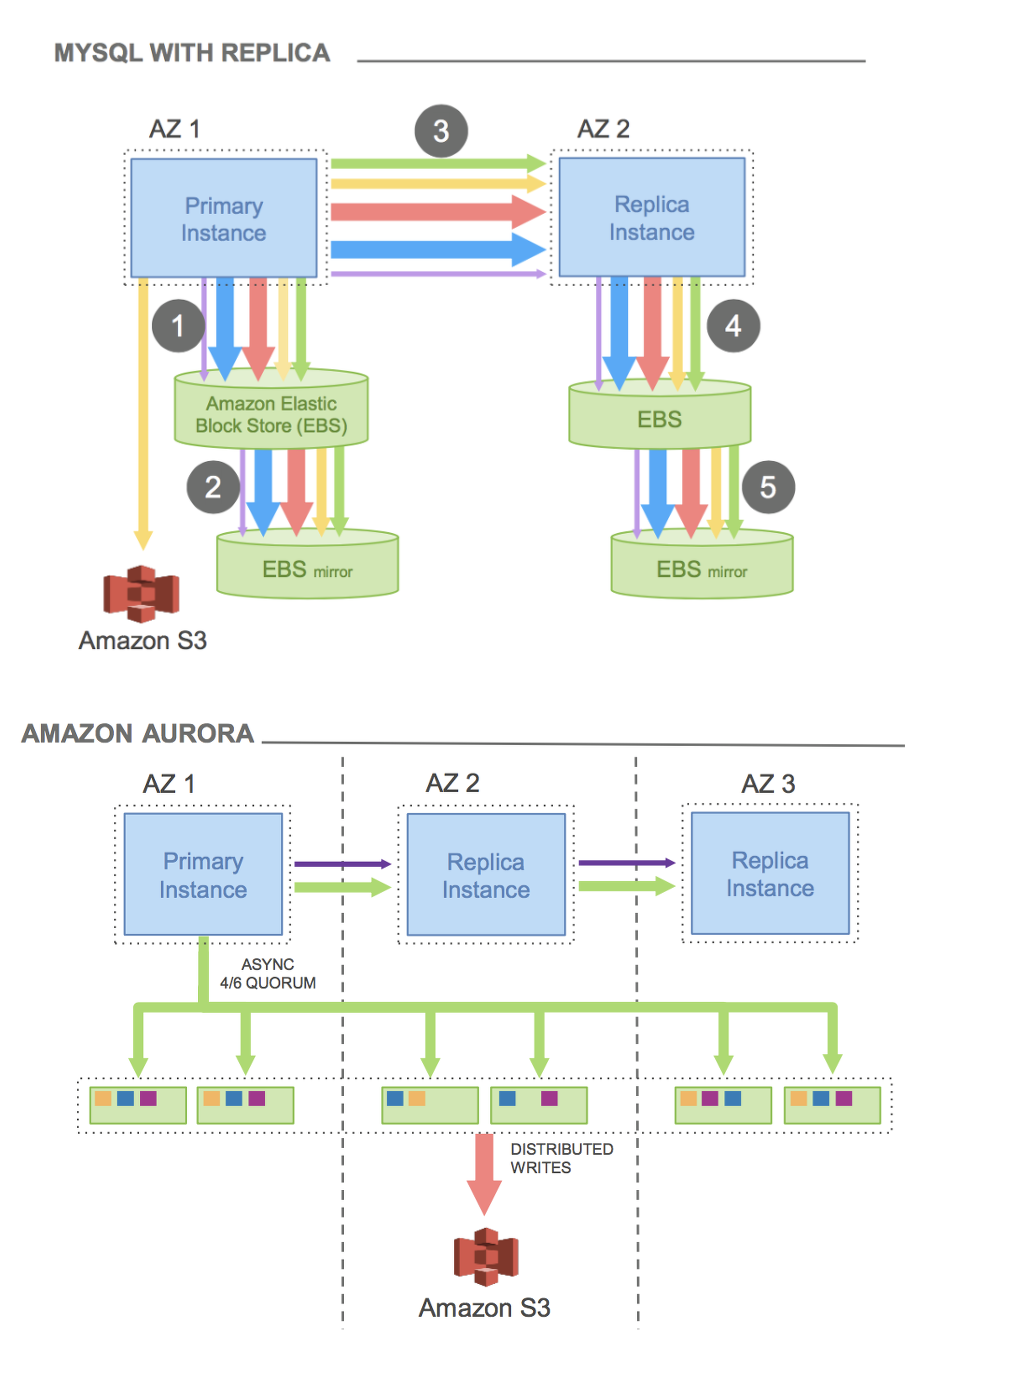

- MySQL 의 경우 자신의 EBS로 데이터를 쌓고, 쌓은 데이터를 EBS로 미러링 한 다음, Replication을 통해 Replica로 데이터를 보내고, Replica는 받은 데이터를 자신의 스토리지로 쌓는다.

- Aurora의 경우에는 4/6 쿼럼을 사용해 스토리지에 저장하며, Replica로 보내는 것은 Frm 및 Redo log 이다. 그래서 Network Bandwidth 사용도 적으며, 빠르게 변경분을 저장하고 반영할 수 있다. (즉 스토리지 레벨에서 복제가 발생한다.)



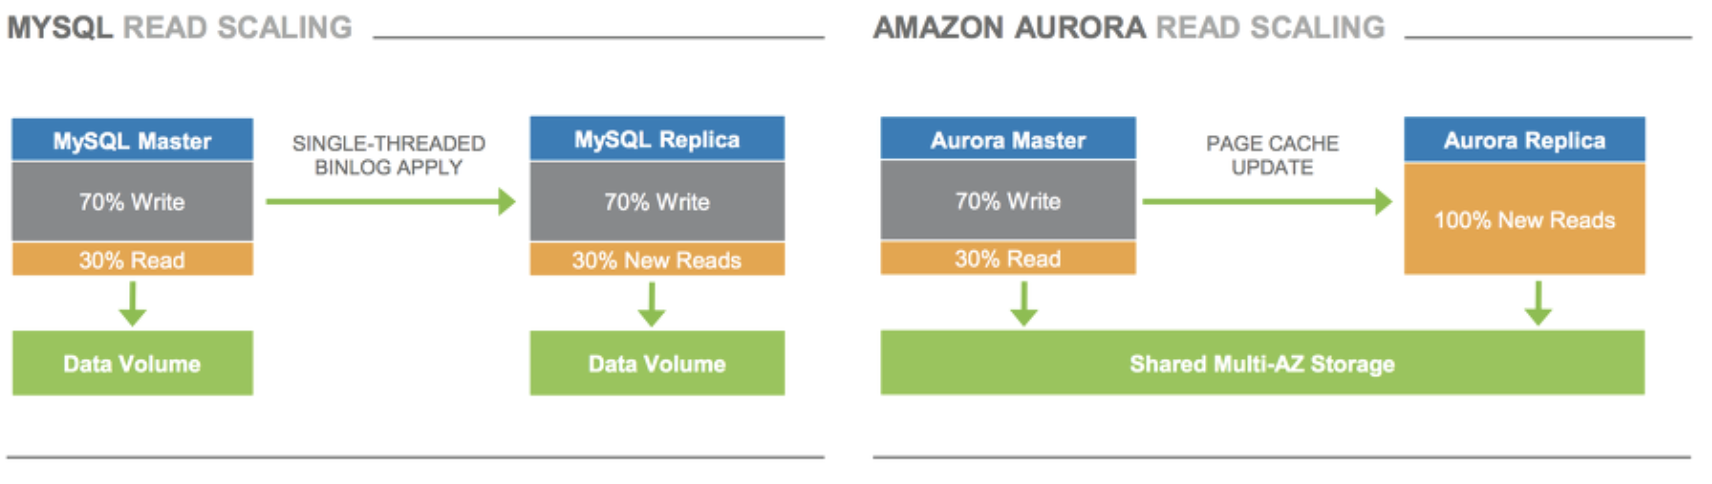

- MySQL의 경우 Read Replica도 binlog를 받아서 처리해야하기 때문에, Read 뿐만 아니라, Write도 같이 처리해야하는 단점이 있다.
- AWS Aurora Mysql 의 경우, Read Replica가 binlog를 잃어서 싱크를 맞추는 것이 아니라,redo log를 받아서 동기화하기 때문에, read에만 집중할 수 있다.


**결론**

- RDS MySQL 과 AWS Auroral MySQL의 가장 큰 차이점은 Storage 및 관리 주체, Read Replica의 구성 방식 세가지로 볼 수 있다.

- Storage : RDS MySQL은 자체 EBS(Storage와 Page 기반의 Replication)로 운영하지만, Aurora MySQL은 Shared Storage를 사용한다.

- 관리 주체 : RDS MySQL은 관리자가 RDS MySQL의 버전을 관리하지만, Aurora MySQL은 AWS가 개발해서 버전 업그레이드를 주기적으로 하기 떄문에 optional 또는 mandatory가 AWS에 의해 정해질 수 있다.

- Read Replica 구성 : RDS MySQL은 standby와 read replica를 만들 때 binlog를 사용하지만, Aurora의 경우 내부 storage 및 redo log 전송을 통해 빠른 통기화가 가능하며 bandwidth를 줄일 수 있다.

**Aurora 4가지 Endpoint**

**Aurora는 Cluster 단위로 운영이 되고, Cluster와 Instance가 서로 독립적인 구조를 가지기 때문에 Instance가 없는 빈 껍데기인 Cluster 운영도 가능.**

- Cluster Endpoint
  - Writer Endpoint 라는 이름으로 등장했지만 현재는 Cluster Endpoint라고 한다.
  - AUrora는 Single Write Cluster이기 떄문에, Writer Instance만 접근 되는 endpoint이므로, Failover되면 해당 endpoint에 맵핑되는 Instance가 달라진다.
- Read Endpoint : Aurora Read Replica들을 그룹화한 Endpoint이다. 라운드 로빈으로 커넥션을 맺는다.
- Instance Endpoint: 각 Aurora Instance 하나하나 들어갈 수 있는 Endpoint 이다.
- Custon Endpoint: Route53이랑 비슷한 역할을 하며, 관리요소에 따라 Endpoint를 여러개 만들 수 있다.

  - Write 요청과 Read 요청의 상황을 예시로 들어 어떻게 해당 Endpoint로 접근하는지 알아보자.
  - 먼저, Write 요청이 들어오는 경우 Cluster Endpoint로 접근하여 Master 인스턴스에 직접 Write 쿼리를 날린다.
  - Read 요청이 들어오게 되면 Cluster 레벨에서 관리하는 Read Endpoint로 요청을 보내게 되고, 각 Read Replica로 로드 밸런싱된다.


​

**Aurora는**

- MySQL 혹은 PostgreSQL을 AWS로 Migration 하여 사용하는 경우에 적용 가능
- 기본 3개 가용 영역과 6벌의 복제본으로 가용성과 내구성 유지
- 독특한 스토리지 서브시스템(storage subsystem)으로 고성능 제공
- CRR 기능으로 글로벌하게 배포하여 지역적 지연(latency)을 줄일 수 있음

- MySQL보다 5배 빠른 성능(RDS MySQL보다는 비싼 비용은 감수)

- 성능, 확장성, 가용성이 중요한 애플리케이션 서비스에 적합

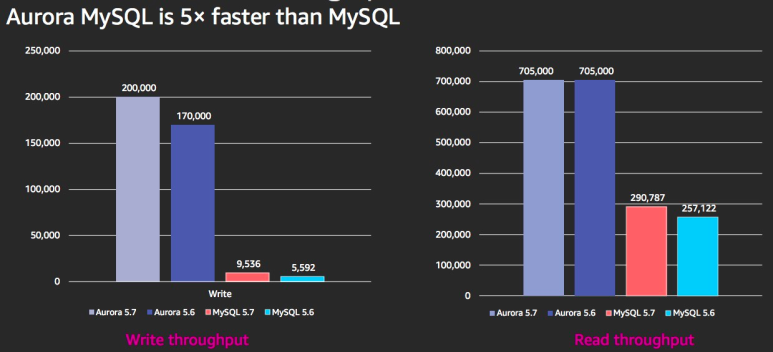

<AuroraMySQL과 MySQL의 쓰기/읽기 출력 비교>